<a href="https://colab.research.google.com/github/data-tamer2410/ds-fashion-mnist-classifier-2.0/blob/main/fashion_mnist_classifier_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task.

We need to create a neural network using Keras mechanisms that will classify products from the fasion_mnist dataset.

# Solving the task.

In [61]:
import numpy as np
import json
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras import layers
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.applications import VGG16
from keras.preprocessing.image import smart_resize
%matplotlib inline

## Data loading and preparation.

In [4]:
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

In [5]:
# We normalize the features, configure the data types, and divide the training data into training and validation data.
# Also, we change the feature size by adding a channel, this data format is accepted by CNN.
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.17,random_state=4,stratify=y_train)

In [6]:
# For convenience, we will transfer the target values ​​to the categorical type.
num_classes = np.unique(y_train).size

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_val = to_categorical(y_val,num_classes)

## Convolutional neural network solutions from scratch.

In [17]:
activation = 'relu'

cnn = Sequential([
    layers.Input(shape=x_train[0].shape),

    layers.Conv2D(32,(3,3),activation=activation),
    layers.MaxPool2D(),

    layers.Conv2D(64,(3,3),activation=activation),
    layers.MaxPool2D(),

    layers.Conv2D(128,(3,3),activation=activation),

    layers.Flatten(),
    layers.Dense(256,activation=activation),

    layers.Dense(num_classes,activation='softmax')
])

cnn.compile(loss='categorical_crossentropy',
            optimizer=optimizers.Adam(learning_rate=1e-3),
            metrics=['acc'])

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,410 (1.49 MB)

 Trainable params: 390,410 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 512
epochs = 50
early_stop = EarlyStopping(monitor='val_acc',patience=10,restore_best_weights=True) # To prevent overtraining, we use an early stop.

history = cnn.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val),
                  callbacks=[early_stop])

In [19]:
history = history.history
i = np.argmax(history['val_acc'])

print(f'Train Loss: {history["loss"][i]:.5f}\n'
      f'Val Loss: {history["val_loss"][i]:.5f}\n'
      f'Train Accuracy: {history["acc"][i]:.2%}\n'
      f'Val Accuracy: {history["val_acc"][i]:.2%}')

Train Loss: 0.10109
Val Loss: 0.24484
Train Accuracy: 96.36%
Val Accuracy: 92.20%


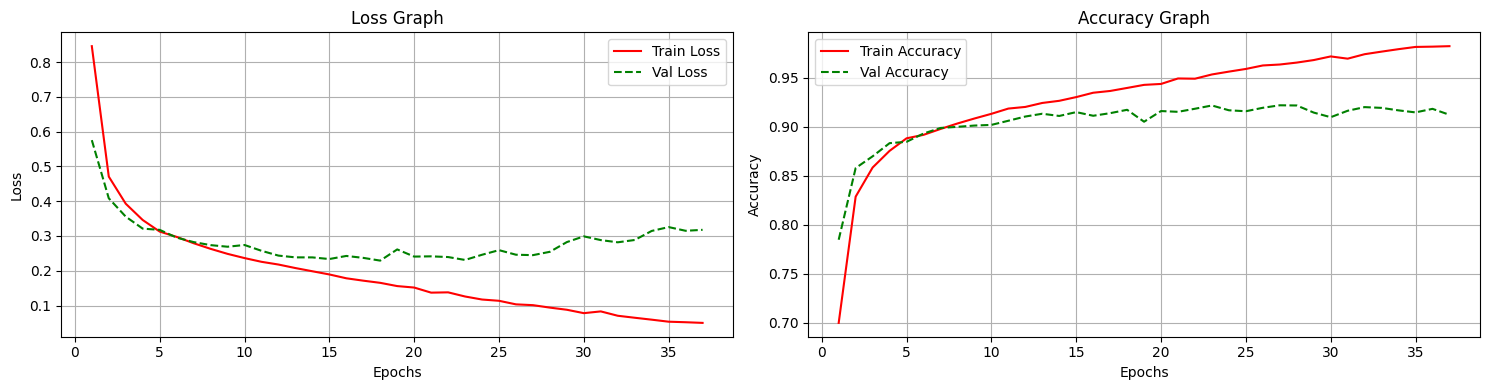

In [20]:
# Visualization of model training.
x = range(1,len(history['loss']) + 1)

fig, axs = plt.subplots(ncols=2,figsize=(15,4))

axs[0].plot(x,history['loss'],'r',label='Train Loss')
axs[0].plot(x,history['val_loss'],'g--',label='Val Loss')

axs[0].set_title('Loss Graph')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

axs[1].plot(x,history['acc'],'r',label='Train Accuracy')
axs[1].plot(x,history['val_acc'],'g--',label='Val Accuracy')

axs[1].set_title('Accuracy Graph')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

In [21]:
# Network testing.
cnn_scores = cnn.evaluate(x_test,y_test,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9089 - loss: 0.3010


## A feature extraction and fine-tuning solution for convolutional network preselection.

### Data preparation.

In [7]:
# First we need to resize our images to 64x64 and add channels to make them RGB.
# This format requires the VGG16 model.
x_train_64x64 = smart_resize(x_train,(64,64))
x_test_64x64 = smart_resize(x_test,(64,64))
x_val_64x64 = smart_resize(x_val,(64,64))

x_train_rgb = np.repeat(x_train_64x64,3,axis=-1)
x_test_rgb = np.repeat(x_test_64x64,3,axis=-1)
x_val_rgb = np.repeat(x_val_64x64,3,axis=-1)

### Feature extraction technique.

We will use VGG16 as a convolutional basis.

In [ ]:
# We take only the convolutional basis without using the last Dense classifier, we will create and train it separately for our data.
conv_base = VGG16(include_top=False,weights='imagenet',input_shape=x_train_rgb[0].shape)
conv_base.trainable = False # Freeze the convolution layers.
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Let's create a complete model.
activation = 'relu'

x = layers.Flatten()(conv_base.output)
x = layers.Dense(256, activation=activation)(x)
x = layers.Dense(num_classes,activation='softmax')(x)

model = Model(inputs=conv_base.input, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,241,802 (58.14 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Model training.
batch_size = 256
epochs = 100
early_stop = EarlyStopping(monitor='val_acc',patience=10,restore_best_weights=True)

history = model.fit(
          x_train_rgb,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val_rgb,y_val),
          callbacks=[early_stop])

In [ ]:
# Model saving.
model.save('/content/drive/MyDrive/vgg16_fashion_feat_extr.h5')

In [ ]:
history = history.history
i = np.argmax(history['val_acc'])

print(f'Train Loss: {history["loss"][i]:.5f}\n'
      f'Val Loss: {history["val_loss"][i]:.5f}\n'
      f'Train Accuracy: {history["acc"][i]:.2%}\n'
      f'Val Accuracy: {history["val_acc"][i]:.2%}')

Train Loss: 0.12311
Val Loss: 0.26302
Train Accuracy: 95.95%
Val Accuracy: 91.19%


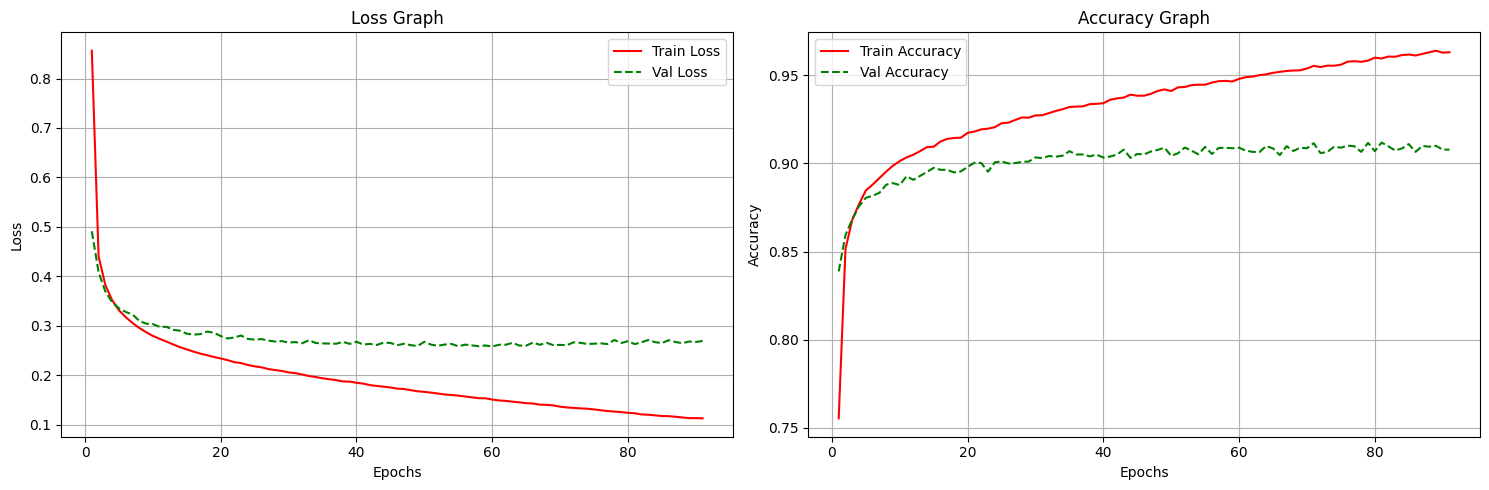

In [ ]:
# Visualization of model training.
x = range(1,len(history['loss']) + 1)

fig, axs = plt.subplots(ncols=2,figsize=(15,5))

axs[0].plot(x,history['loss'],'r',label='Train Loss')
axs[0].plot(x,history['val_loss'],'g--',label='Val Loss')

axs[0].set_title('Loss Graph')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

axs[1].plot(x,history['acc'],'r',label='Train Accuracy')
axs[1].plot(x,history['val_acc'],'g--',label='Val Accuracy')

axs[1].set_title('Accuracy Graph')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

In [16]:
# Network testing.
feature_extr_vgg16_scores = model.evaluate(x_test_rgb,y_test,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - acc: 0.9046 - loss: 0.2849


### Fine-tune technique.

In [9]:
# We will teach layers starting from the 5th block.
trainable = False
for layer in model.layers:
    if layer.name.startswith('block5'):
      trainable = True
    layer.trainable = trainable

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,241,804 (58.14 MB)

 Trainable params: 7,606,538 (29.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Model training.
model.compile(optimizer=optimizers.Adam(learning_rate=1e-6),
              loss='categorical_crossentropy',
              metrics=['acc'])

batch_size = 128
epochs = 100
early_stop = EarlyStopping(monitor='val_acc',patience=10,restore_best_weights=True)

history = model.fit(
          x_train_rgb,
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks=[early_stop],
          validation_data=(x_val_rgb,y_val)
          )

In [ ]:
# Model saving.
model.save('/content/drive/MyDrive/vgg16_fashion_fine_tune.h5')

In [12]:
history = history.history
i = np.argmax(history['val_acc'])

print(f'Train Loss: {history["loss"][i]:.5f}\n'
      f'Val Loss: {history["val_loss"][i]:.5f}\n'
      f'Train Accuracy: {history["acc"][i]:.2%}\n'
      f'Val Accuracy: {history["val_acc"][i]:.2%}')

Train Loss: 0.01383
Val Loss: 0.28646
Train Accuracy: 99.94%
Val Accuracy: 92.19%


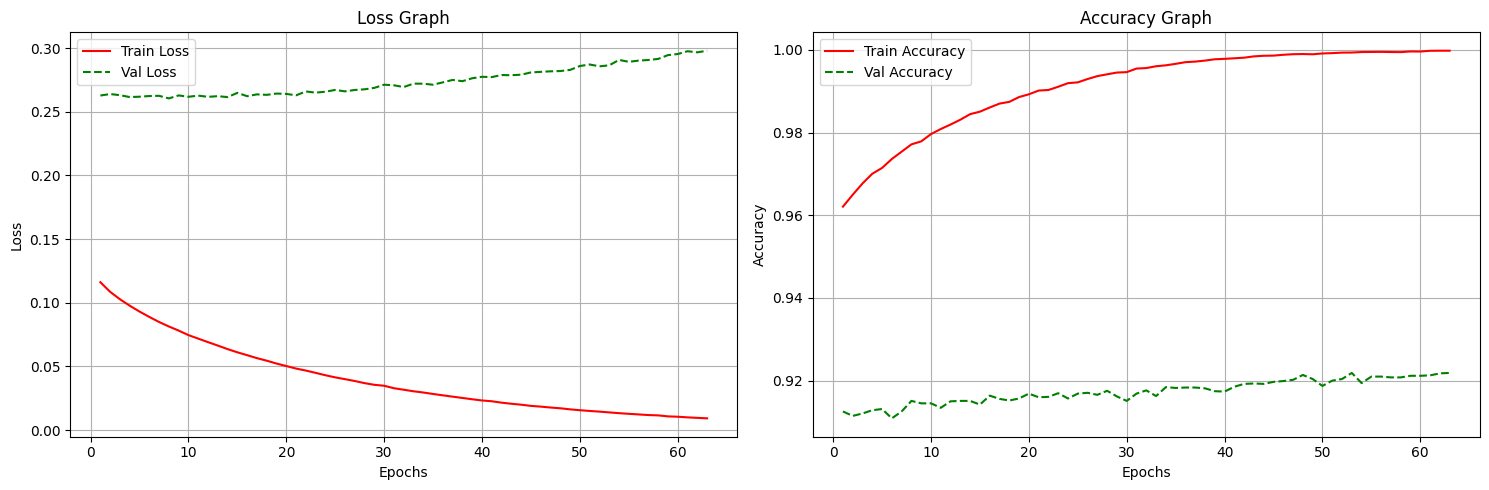

In [13]:
# Visualization of model training.
x = range(1,len(history['loss']) + 1)

fig, axs = plt.subplots(ncols=2,figsize=(15,5))

axs[0].plot(x,history['loss'],'r',label='Train Loss')
axs[0].plot(x,history['val_loss'],'g--',label='Val Loss')

axs[0].set_title('Loss Graph')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epochs')
axs[0].legend()
axs[0].grid()

axs[1].plot(x,history['acc'],'r',label='Train Accuracy')
axs[1].plot(x,history['val_acc'],'g--',label='Val Accuracy')

axs[1].set_title('Accuracy Graph')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

In [14]:
# Network testing.
fine_tune_vgg16_scores = model.evaluate(x_test_rgb,y_test,return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - acc: 0.9170 - loss: 0.3154


## Comparison of model results.

In [65]:
# Let's download the estimates of the fully connected network tested and trained on fashion_mnist.
with open('dense_res_fashion.json','r',encoding='utf-8') as f:
    dense_scores = json.load(f)
dense_scores

{'loss': 0.32937899231910706, 'accuracy': 0.8833000063896179}

You can find the construction of this network [here](https://github.com/data-tamer2410/ds-fashion-mnist-classifier).

In [66]:
# Preperation score.
dense_scores['acc'] = dense_scores.pop('accuracy')
dense_scores

{'loss': 0.32937899231910706, 'acc': 0.8833000063896179}

In [67]:
all_scores = {'CNN':cnn_scores,
              'VGG_feature_extraction':feature_extr_vgg16_scores,
              'VGG_fine_tune':fine_tune_vgg16_scores,
              'Dense_clf': dense_scores}

for name,scores in all_scores.items():
    print(f'{name}:\n'
          f'Loss: {scores["loss"]:.5f}\n'
          f'Accuracy: {scores["acc"]:.2%}\n')

CNN:
Loss: 0.27847
Accuracy: 91.18%

VGG_feature_extraction:
Loss: 0.29126
Accuracy: 90.25%

VGG_fine_tune:
Loss: 0.32357
Accuracy: 91.57%

Dense_clf:
Loss: 0.32938
Accuracy: 88.33%



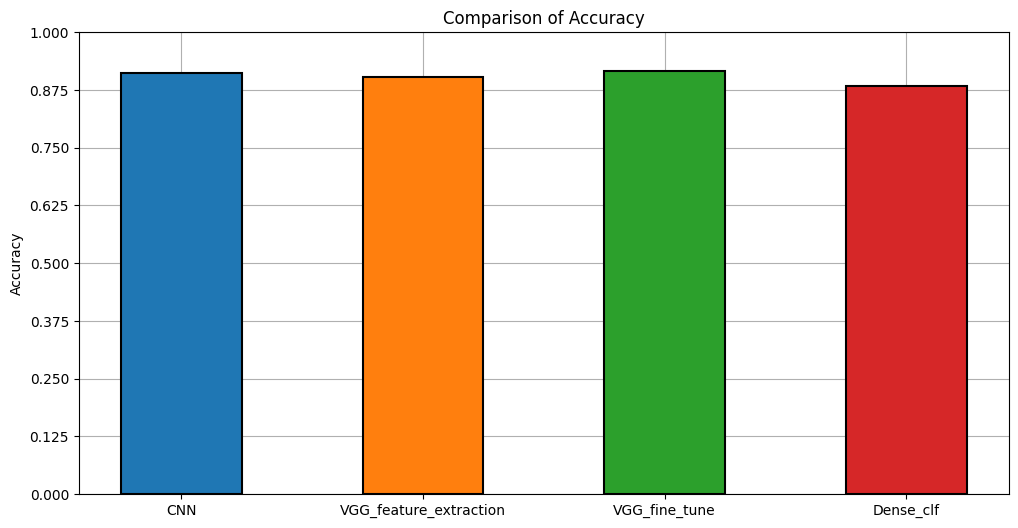

In [68]:
x_labels = [model for model in all_scores.keys()]
heights = [scores['acc'] for scores in all_scores.values()]

width = 0.5
x = range(len(x_labels))

plt.figure(figsize=(12,6))

[plt.bar(el,h,width=width,zorder=2,edgecolor='black',linewidth=1.5) for el,h in zip(x,heights)]

plt.title('Comparison of Accuracy')
plt.xticks(x,x_labels)
plt.yticks(np.linspace(0,1.0,9))
plt.ylabel('Accuracy')

plt.grid(zorder=1)
plt.show()

## Conclusion.


### **English**

---

In this project, three neural networks were implemented for the classification of Fashion MNIST images: a custom Convolutional Neural Network (CNN), VGG16 for feature extraction, and fine-tuning of VGG16. Additionally, results of a dense classifier were loaded to compare various model architectures and training approaches.  

1. **CNN**: This custom-built CNN achieved an accuracy of 91.18% with a loss of 0.27847, demonstrating that a straightforward architecture with convolutional and dense layers can yield strong performance on the Fashion MNIST dataset.
2. **VGG16 Feature Extraction**: By using VGG16's pre-trained convolutional layers as a feature extractor (without updating their weights), the model achieved a slightly lower accuracy of 90.25% with a loss of 0.29126. This shows the value of transfer learning, although it did not surpass the custom CNN in this case.
3. **VGG16 Fine-Tuning**: Fine-tuning the top layers of VGG16, while keeping the initial convolutional layers frozen, resulted in the highest accuracy of 91.57% with a loss of 0.32357. Fine-tuning allowed for targeted adjustments to the pre-trained features, which enhanced performance.

Overall, fine-tuning a pre-trained model yielded the best results, showing that optimizing a pre-trained network for the Fashion MNIST dataset can surpass a fully custom network. However, the dense classifier loaded for comparison reached an accuracy of only 88.33% with a loss of 0.32938, reinforcing that convolutional layers are crucial for extracting relevant patterns from image data.


### **Ukrainian**

---

У цьому проєкті було реалізовано три нейронні мережі для класифікації зображень із набору даних Fashion MNIST: власна згорткова нейронна мережа (CNN), використання VGG16 для виділення ознак і донастройка VGG16. Також було завантажено результати щільного класифікатора для порівняння різних архітектур та підходів до навчання.

1. **CNN**: Власна CNN досягла точності 91.18% при втраті 0.27847, показуючи, що проста архітектура з комбінацією згорткових та щільних шарів може забезпечити хороші результати на Fashion MNIST.
2. **Виділення ознак VGG16**: Використання VGG16 як основи для виділення ознак без оновлення ваг дало трохи нижчу точність 90.25% і втрату 0.29126. Це свідчить про ефективність трансферного навчання, хоча в даному випадку власна CNN виявилася ефективнішою.
3. **Донастройка VGG16**: Донастройка верхніх шарів VGG16 при заморожених нижніх шарах дала найвищу точність 91.57% при втраті 0.32357. Це дозволило моделі адаптуватися до даних Fashion MNIST і покращити результати.

Таким чином, донастройка попередньо навченої моделі принесла найкращі результати, демонструючи, що адаптація такої мережі для набору даних Fashion MNIST може перевершити повністю власну архітектуру. Щільний класифікатор, результати якого були завантажені для порівняння, досяг лише 88.33% точності з втратою 0.32938, що підтверджує важливість згорткових шарів для виділення ключових ознак у зображеннях.
